In [389]:
import numpy as np
from scipy.optimize import fsolve
from scipy.linalg import eigh

In [390]:
cov = np.array([[3,3],[3,5]])
cov_inv = np.linalg.inv(cov)
diag = np.diag(1/eigh(cov)[0]**2)

In [391]:
def f_optimize(p):
    a,b = p
    R = np.array([[a,-b],[b,a]])
    detR = np.linalg.det(R)
    #det(R) = 1
    R_inv = np.linalg.inv(R)
    Lambda = np.dot(R_inv, np.dot(cov_inv, R))
    #R^TC^(-1)R = 1
    res = Lambda - diag
    #res = detR - np.linalg.det(R_inv)
    return res[1,0], detR - 1.

In [392]:
res = fsolve(f_optimize, np.random.randn(2))

In [393]:
#test
f_optimize(res)

(1.1865526087629773e-13, -1.1934897514720433e-13)

In [394]:
np.isclose(f_optimize(res), [0.0, 0.0])

array([ True,  True])

In [395]:
Rotation_matrix = np.array([[res[0], res[1]],[-res[1], res[0]]])

In [396]:
Rotation_matrix

array([[ 0.81124219, -0.58471028],
       [ 0.58471028,  0.81124219]])

In [397]:
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal([0,0], cov, 50000).T
x_rot, y_rot = [], []
for i, x_ in enumerate(x):
    x_rot_i, y_rot_i = Rotation_matrix.dot(np.array([x[i], y[i]]))
    x_rot.append(x_rot_i), y_rot.append(y_rot_i)

[[1.         0.77345905]
 [0.77345905 1.        ]]
[[ 1.        -0.0047948]
 [-0.0047948  1.       ]]


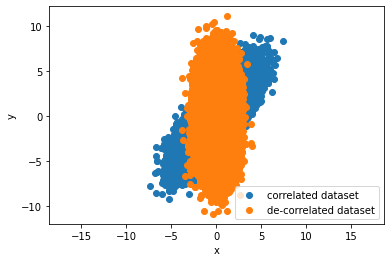

In [398]:
plt.scatter(x,y ,label = 'correlated dataset')
print(np.corrcoef(x,y))
plt.scatter(x_rot,y_rot, label = 'de-correlated dataset')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
print(np.corrcoef(x_rot,y_rot))

In [399]:
def symmetrize(a):
    return a + a.T - np.diag(a.diagonal())

In [400]:
cov_new = np.random.randn(9,9)
cov_new = symmetrize(cov_new)
n = len(cov_new.diagonal())
for i in range(n):
    cov_new[i,i] = abs(cov_new[i,i])
cov_inv_new = np.linalg.inv(cov_new)

In [456]:
diag = np.diag(1/eigh(cov_new)[0]**2)
eye = np.diag(np.zeros(n)+1)
n = len(cov_new.diagonal())
def f_optimize(p):
    R = p.reshape([n,n])
    detR = np.linalg.det(R)
    R_inv = np.linalg.inv(R)
    Lambda_T = np.dot(R.T, np.dot(cov_inv_new, R))
    Lambda_inv = np.dot(R_inv, np.dot(cov_inv_new, R))
    res_lambda_T = Lambda_T - diag
    res_lambda_inv = Lambda_inv - diag
    res_inv = R_inv - R.T
    res_eye = np.dot(R_inv, R) - eye
    equation = []
    for i in range(n):
        for j in range(n):
                if i >= j:
                    equation.append(res_lambda_T[i,j])
                if i < j:
                    equation.append(res_inv[i,j])
    equation[3] = detR-1
    return equation

In [457]:
res = fsolve(f_optimize, np.random.randn(n*n))
np.diag(np.array(f_optimize(res)).reshape(n,n))

array([ 0.55208552, -1.18146587, -2.87681931,  0.69055065, -1.64778051,
        1.41390673, -8.99559799, -4.36177573,  4.89291529])

In [458]:
R = res.reshape(n,n)

In [459]:
print(R)
print(np.linalg.det(R))

[[-9.68944215e-01 -3.41721532e+00  1.47094170e+00 -1.19297774e+00
  -2.09495688e+00  2.50534107e+00 -3.70822458e+00 -2.88927100e+00
  -9.13799905e-01]
 [ 3.80928689e-01 -2.36482324e+00  1.60182191e+00  3.80820132e-01
  -1.79115624e+00  1.18541347e+00 -1.08031416e+00 -3.20763312e+00
   3.88283120e+00]
 [ 1.13314273e+00  5.69373556e-01  1.82580882e-02  2.66508297e+00
   2.58801361e-02 -4.20915090e+00 -2.96729262e+00  1.29710780e+00
  -7.52653567e+00]
 [ 6.54054387e-01  2.10566170e+00 -8.54538950e-01  7.32721403e-03
   1.12654874e+00 -1.05801142e-01  4.44881310e+00  8.04691689e-01
   5.19081227e+00]
 [ 1.00698052e-01 -2.14774684e+00  5.76419260e-01 -2.62149957e-01
  -8.28525921e-01  9.60210154e-01 -2.20512072e+00 -1.47965883e+00
  -1.01155474e+00]
 [-1.07888863e-01 -8.71225920e-01 -6.57226263e-01  8.06158252e-01
  -8.74652147e-01 -8.14952328e-02  1.76212796e-01  4.85422283e-01
   1.04178227e-01]
 [ 6.87433011e-02 -2.05686280e-01 -3.69566591e-01 -1.03478519e+00
   8.00798543e-02 -8.2137727